# Integral Energy

The integral energy approach proposed by Minasny and McBratney () aims at characterizing the total amount of work required to extract a given amount of water from the soil. This approach can be useful to better understand plant responses to soil water stress since it does not assume equal availability of water between two potentials like the traditional available water capacity approach.

$$ E_i = \int_{\theta_i}^{\theta_f} \frac{1}{\theta_i - \theta_f} \psi(\theta) \; d\theta$$

We will use the soil water retention model proposed by van Genuchten (1980) since it is the most familiar for students in soil science.


In [1]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt


In [7]:
# Define soil water retention model
model = lambda x, alpha, n, theta_r, theta_s: theta_r + (theta_s-theta_r)*(1+(alpha*x)**n)**-(1-1/n)


In [51]:
# Range in matric potential
fc = 10   # J/kg
wp = 1500 # J/kg
N = 10000
matric = np.logspace(np.log10(fc), np.log10(wp), N)
theta_clay = model(matric, 1.22, 1.34, 0.23, 0.64)
theta_silty_clay = model(matric, 0.05, 1.1, 0, 0.42)


In [53]:
# Voluemtric water content values at filed capacity (-10 j/kg)
print('Clay at -10 J/kg:', theta_clay[0])
print('Clay at -1500 J/kg:', theta_clay[-1])


Clay at -10 J/kg: 0.4036316446192434
Clay at -1500 J/kg: 0.2618820180889577


In [55]:
# Voluemtric water content values at filed capacity (-1500 j/kg)
print('Silty-clay at -10 J/kg:', theta_silty_clay[0])
print('Silty-clay at -1500 J/kg:', theta_silty_clay[-1])


Silty-clay at -10 J/kg: 0.40563208021830816
Silty-clay at -1500 J/kg: 0.2725227698750801


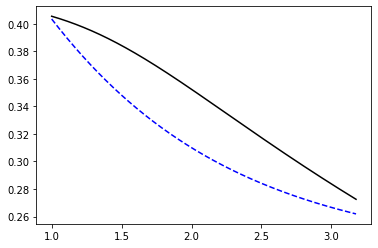

In [56]:
plt.plot(np.log10(matric), theta_clay, '--b', label='Clay')
plt.plot(np.log10(matric), theta_silty_clay, '-k', label='Silty clay')
plt.show()


## Water Storage

In [57]:
# Total storage clay between -10 and -1500 J/kg
W_clay = 1/np.abs(fc - wp) * np.trapz(theta_clay, matric)
print(W_clay)


0.2768349634688867


In [58]:
# Total storage silty clay between -10 and -1500 J/kg
W_silty_clay = 1/np.abs(fc - wp) * np.trapz(theta_silty_clay, matric)
print(W_silty_clay)


0.3001711916723065


## Energy

In [62]:
# Integral energy
theta_i = theta_clay[0]
theta_f = theta_clay[-1]
E_clay = 1/(theta_i - theta_f) * np.trapz(matric, x=theta_clay)
E_clay


-167.17775885168777

In [63]:
theta_i = theta_silty_clay[0]
theta_f = theta_silty_clay[-1]
E_silty_clay = 1/(theta_i - theta_f) * np.trapz(matric, x=theta_silty_clay)
E_silty_clay


-319.49111201644075